
🐶 End-to-end Multil-class Dog Breed Classification

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub.

1. Problem

Identifying the breed of a dog given an image of a dog.

When I'm sitting at the cafe and I take a photo of a dog, I want to know what breed of dog it is.

2. Data

The data we're using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data

3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

4. Features

Some information about the data:

* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (these images have labels).
* There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them).



# Dog Breed Classification

In [0]:
# unzip the data
# !unzip '/content/drive/My Drive/data/dog-breed-identification.zip' -d '/content/drive/My Drive/data/dog_vision'

## Getting our workspace ready
- [x] import tensoflow 2.x
- [x] import tensorflow hub
- [x] make sure we're using GPU

In [2]:
# import tensorflow into colab
import tensorflow as tf

# import tensorflow hub
import tensorflow_hub as hub

# see the version of tf hub
print('Tensorflow hub version ==>', hub.__version__)

# see the version of tensorflow
print('Tensorflow version ==>', tf.__version__)

# check for gpu availability
print('GPU', 'is available :)' if tf.config.list_physical_devices('GPU') else 'is Not available :(')

Tensorflow hub version ==> 0.8.0
Tensorflow version ==> 2.2.0-rc2
GPU is available :)


## Getting our data ready

In [3]:
# Checkout the lables of our data
import pandas as pd
label_csv = pd.read_csv('/content/drive/My Drive/data/dog_vision/labels.csv')
label_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
# descibe the data
label_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,2a114941065b77b8d5d0c19b9256ecc6,scottish_deerhound
freq,1,126


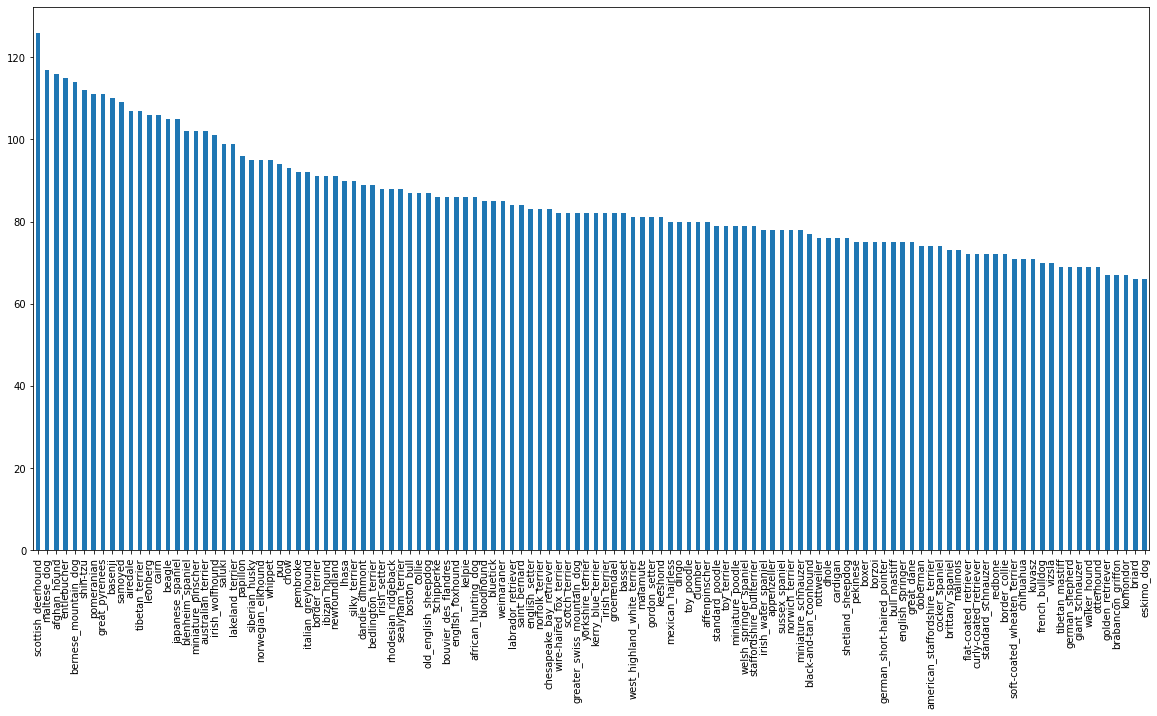

In [5]:
# How many images are there of each breed
label_csv['breed'].value_counts().plot.bar(figsize=(20, 10))

In [6]:
# calculate the average of each class of dog breed
label_csv['breed'].value_counts().median()

82.0

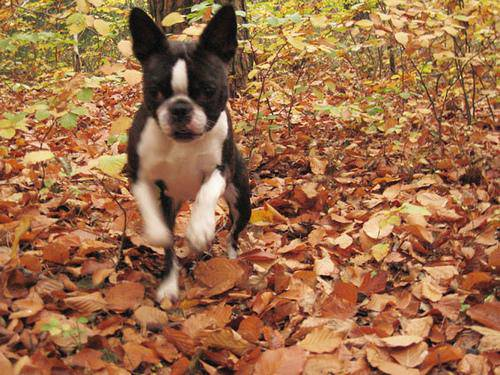

In [7]:
# view image of a dog
from IPython.display import Image
Image('/content/drive/My Drive/data/dog_vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

## Getting images and labels
list of all of our image files path-name

In [8]:
# create a list of all images path
path_list = ['/content/drive/My Drive/data/dog_vision/train/' + fname + '.jpg' for fname in label_csv['id']]

# check the first 10
path_list[:10]

['/content/drive/My Drive/data/dog_vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/My Drive/data/dog_vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/My Drive/data/dog_vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/My Drive/data/dog_vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/My Drive/data/dog_vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/My Drive/data/dog_vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/My Drive/data/dog_vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/My Drive/data/dog_vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/My Drive/data/dog_vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/My Drive/data/dog_vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [9]:
# check number of files we imported
import os
if len(os.listdir('/content/drive/My Drive/data/dog_vision/train')) == len(path_list):
  print('File path match actual amout of data :D')
else:
  print('File path not match actual amout of data :(')

File path match actual amout of data :D


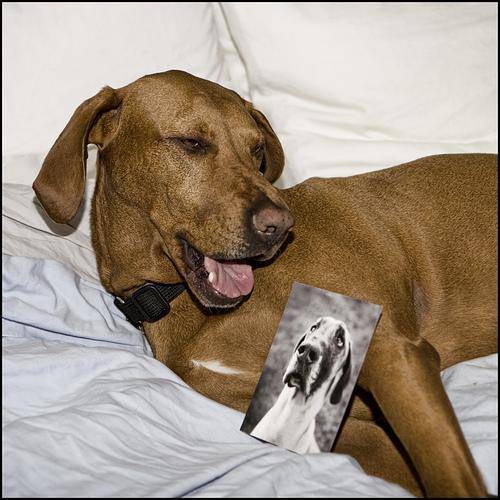

In [10]:
# one more check and see and image
Image(path_list[100])

In [11]:
# check the dog breed in the image
label_csv['breed'][100]

'rhodesian_ridgeback'

## Turn the data into numerical form

In [12]:
# create labels variable and save the breed label in it
labels = label_csv['breed']
labels.head()

0         boston_bull
1               dingo
2            pekinese
3            bluetick
4    golden_retriever
Name: breed, dtype: object

In [13]:
# create numpy array of labels 
import numpy as np
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [14]:
# see the length of labels
len(labels)

10222

In [15]:
# Checking for missing data (check the equal estatement labels and path_list)
if len(path_list) == len(labels):
  print('Length of path_list is equal to labels :)')
else:
  print('Length of path_list is not equal to labels :(')

Length of path_list is equal to labels :)


In [16]:
# find the unique label values
unique_labels = np.unique(labels)
print(len(unique_labels))

120


In [17]:
# Turn a single label into an array of booleans
labels[0] == unique_labels

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [18]:
# Turn every lable into boolean array
boolean_labels = [label == unique_labels for label in labels]
boolean_labels[:4]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [19]:
# Turn boolearn array into integers

# use argmax
print(boolean_labels[0].argmax())
# use astype()
print(boolean_labels[0].astype(int))

19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set

In [0]:
# setup x, y
x = path_list
y = boolean_labels

In [0]:
# strat off experimenting with 1000 images
NUMBER_IMAGES = 1000 #@param {type:'slider', min:1000, max:10000, step:1000}
# set the number of images use @param 

In [0]:
# use train, test and split
from sklearn.model_selection import train_test_split 
x_train, x_valid, y_train, y_valid = train_test_split(x[:NUMBER_IMAGES],
                                                      y[:NUMBER_IMAGES],
                                                      random_state=42,
                                                      test_size=0.2)

In [23]:
# Check the length of splited data
len(x_train), len(y_train), len(x_valid), len(y_valid)

(800, 800, 200, 200)

In [24]:
# show the head of splited data
print(x_train[:2])
print(y_train[:2])

['/content/drive/My Drive/data/dog_vision/train/00bee065dcec471f26394855c5c2f3de.jpg', '/content/drive/My Drive/data/dog_vision/train/0d2f9e12a2611d911d91a339074c8154.jpg']
[array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, 

### Preproccessing Images(turnning images into tensors)

In [25]:
# convert an image into a numpy array
from matplotlib.pyplot import imread
image = imread(path_list[42])
image.shape

(257, 350, 3)

In [26]:
# Check the max and min of image
image.max(), image.min()

(255, 0)

In [27]:
# convert the image into tensors
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

In [0]:
# Define an image size
IMG_SIZE = 224
# define a function to proccess the images
def preproccess(image_path, image_size=IMG_SIZE):
  """
  Takes an image path and turn it to tensors.
  """
  # Read an image file
  image = tf.io.read_file(image_path)
  # Turn into numerical Tensor with 3 color channel
  image = tf.image.decode_jpeg(image, channels=3)
  # convert the color channel values from 0-255 to 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)
  # resize the image to (224, 224)
  image = tf.image.resize(image, size=[image_size, image_size])

  return image

### Turnning our data into batches

In [0]:
# create a function to return (image, label)
def tuple_image_lable(image_path, label):
  """
  takes the image tensors and return a tupple of image data and label
  """
  image = preproccess(image_path)
  return image, label

In [0]:
# Define a batch size 
BATCH_SIZE = 32
# create a function to turn all of our data into batches
def data_batch(x, y, batch_size=BATCH_SIZE, valid_data=False, test_data=False):

  # start with test data
  if test_data:
    print("Creating test data batches ...")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(x))
    data_batch = data.map(preproccess).batch(batch_size)
    return data_batch
  
  # valid data set
  elif valid_data:
    print("Creating valid data batches ...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
    data_batch = data.map(tuple_image_lable).batch(batch_size)
    return data_batch
  
  # train data set
  else:
    print("Creating training data batches ...")

    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
    # shuffle the data
    data = data.shuffle(buffer_size=len(x))
    data_batch = data.map(tuple_image_lable).batch(batch_size)
    return data_batch

In [31]:
# create train and valid data
train_data = data_batch(x_train, y_train)
valid_data = data_batch(x_valid, y_valid, valid_data=True)

Creating training data batches ...
Creating valid data batches ...


In [32]:
# check out the different attribute of our data batches
train_data.element_spec, valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualize our data

In [0]:
# import matplotib
import matplotlib.pyplot as plt

# create a function for viewing images in data batch
def show_25_images(images, labels):
  # setup figure
  plt.figure(figsize=(10, 10))
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.title(unique_labels[labels[i].argmax()])
    plt.axis('off')

In [0]:
# make the data iterate
train_images, train_labels = next(train_data.as_numpy_iterator())

In [35]:
# check the length of train images
len(train_images), len(train_labels)

(32, 32)

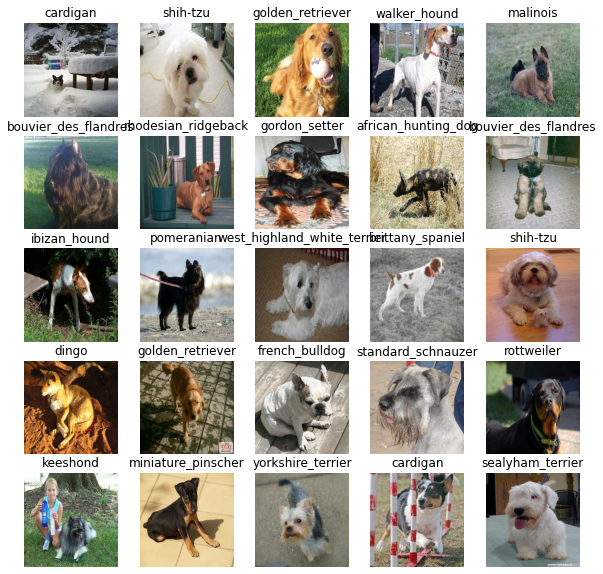

In [36]:
# use visualize function
show_25_images(train_images, train_labels)

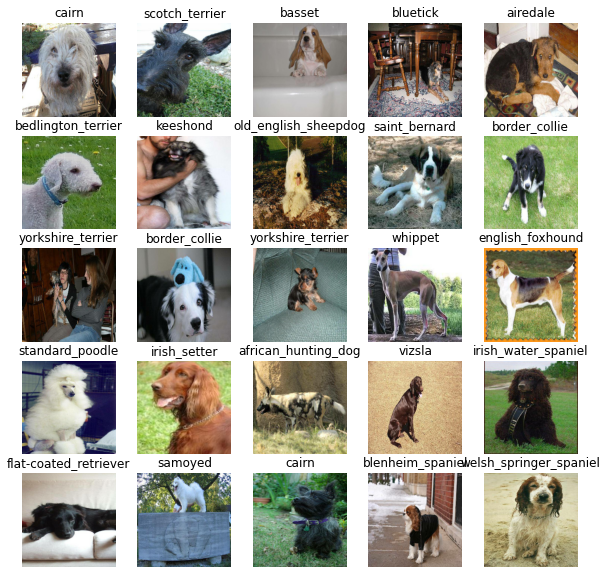

In [37]:
# visualize our validation sets
valid_images, valid_labels = next(valid_data.as_numpy_iterator())
show_25_images(valid_images, valid_labels)

## Building our model

In [0]:
# write our data shape
DATA_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # Batch , height, width, color-channels

# setup the output shape of our model
OUTPUT_SHAPE = len(unique_labels)

# setup model url from tensorflow hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [0]:
# create a model which build a keras model
def create_model(input_shape=DATA_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print('Building a model which:', model_url)

  # setup model layers
  model = tf.keras.Sequential([hub.KerasLayer(model_url), # layer 1 : input layer 
                              tf.keras.layers.Dense(units=output_shape, activation='softmax'), # layer 2: output layer 
                               ])
  # compile the model
  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
  # build the model
  model.build(input_shape)
  return model

In [40]:
model = create_model()
model.summary()

Building a model which: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks

In [0]:
# load TensorBoard extension

%load_ext tensorboard

In [0]:
# import datetime
import datetime

# Create a function to build a tensorBoard callback
def create_tensorboard_callback():
  
  # create a log directory for storing TensorBoard log
  log_dir = os.path.join('/content/drive/My Drive/data/dog_vision/logs',
            datetime.datetime.now().strftime('%Y-%m-%d-%H:%M:%S'))
  return tf.keras.callbacks.TensorBoard(log_dir)

In [0]:
# Create early stopping callback
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                    patience=3)

## Training our model

In [0]:
# number of epochs
NUM_EPOCHS = 100 #@param {type: 'slider', min: 10, max: 100, step: 10}

In [0]:
# Create a function to train the model
def train_model():
  """
  Train the given model and returns trained model.
  """
  # create model
  model = create_model()

  # create new TensorBoard session everytime we train the model
  tensorboard = create_tensorboard_callback()

  # fit the model to the data
  model.fit(x=train_data, epochs=NUM_EPOCHS, validation_data=valid_data,
            validation_freq=1, callbacks=[tensorboard, early_stopping])
  
  return model

In [46]:
# use our train model function
model = train_model()

Building a model which: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 459s 18s/step - loss: 4.5241 - accuracy: 0.0938 - val_loss: 3.4721 - val_accuracy: 0.2250
Epoch 2/100
25/25 [==============================] - 5s 183ms/step - loss: 1.6154 - accuracy: 0.6925 - val_loss: 2.2044 - val_accuracy: 0.5350
Epoch 3/100
25/25 [==============================] - 5s 188ms/step - loss: 0.5684 - accuracy: 0.9438 - val_loss: 1.7088 - val_accuracy: 0.6150
Epoch 4/100
25/25 [==============================] - 5s 184ms/step - loss: 0.2546 - accuracy: 0.9900 - val_loss: 1.5017 - val_accuracy: 0.6400
Epoch 5/100
25/25 [==============================] - 5s 184ms/step - loss: 0.1476 - accuracy: 0.9975 - val_loss: 1.4081 - val_accuracy: 0.6500
Epoch 6/100
25/25 [==============================] - 5s 185ms/step - loss: 0.1010 - accuracy: 1.0000 - val_loss: 1.3612 - val_accuracy: 0.6600
Epoch 7/100
25/25 [===========================

## Making and evaluating predictions using a trained model

In [47]:
# make prediction on the validation data
predictions = model.predict(valid_data, verbose=True)
predictions

7/7 [==============================] - 1s 116ms/step


array([[1.51075923e-03, 4.29141190e-04, 8.59681924e-04, ...,
        4.63513134e-04, 1.79815193e-04, 3.82734393e-03],
       [8.12043960e-04, 4.62089665e-04, 7.04109594e-02, ...,
        4.32705332e-04, 4.61639254e-04, 2.14078264e-05],
       [3.39310827e-06, 1.59952469e-04, 6.91497044e-05, ...,
        1.13473216e-05, 1.81754818e-04, 1.14080365e-04],
       ...,
       [8.32402511e-05, 8.26167758e-04, 3.10158939e-05, ...,
        2.03925112e-04, 9.72579233e-04, 1.03041402e-03],
       [3.73837817e-03, 4.10954788e-04, 1.28946354e-04, ...,
        8.31458019e-05, 6.41397128e-05, 1.57378521e-03],
       [1.06969452e-03, 3.31930823e-05, 8.91229371e-04, ...,
        9.37686209e-03, 2.13523000e-03, 4.02451478e-05]], dtype=float32)

In [48]:
# check the predictions shape 
predictions.shape

(200, 120)

In [49]:
# find the max value in predictions[0]
index = 0
print(f'Max index: {np.argmax(predictions[index])}')
print(f'prediction label : {unique_labels[np.argmax(predictions[index])]}')
print(f'Max probability : {np.max(predictions[index])}')
print(f'Sum : {np.sum(predictions[index])}')

Max index: 17
prediction label : border_terrier
Max probability : 0.2754165232181549
Sum : 1.0000001192092896


In [0]:
# Turn prediction probability into the respective label
def get_pred_label(predictions_probabilities):
  """
  Turn an array of probabilities into a label.
  """
  return unique_labels[np.argmax(predictions_probabilities)]


In [51]:
# instance of get_pred_label 
pred_label = get_pred_label(predictions[20])
pred_label

'flat-coated_retriever'

In [0]:
 # function for unbatch the validation data
 def unbatch(data):
  """
  Take batched data and unbatch them and returns seprate arrays of images and 
  labels.
  """
  images = []
  labels = []
  # loop through unbach data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_labels[np.argmax(label)])
  return images, labels

In [53]:
# instance of unbatch function
valid_images, valid_labels = unbatch(valid_data)
print(valid_images[0])
print(valid_labels[0])

[[[0.29599646 0.43284872 0.3056691 ]
  [0.26635826 0.32996926 0.22846507]
  [0.31428418 0.2770141  0.22934894]
  ...
  [0.77614343 0.82320225 0.8101595 ]
  [0.81291157 0.8285351  0.8406944 ]
  [0.8209297  0.8263737  0.8423668 ]]

 [[0.2344871  0.31603682 0.19543913]
  [0.3414841  0.36560842 0.27241898]
  [0.45016077 0.40117094 0.33964607]
  ...
  [0.7663987  0.8134138  0.81350833]
  [0.7304248  0.75012016 0.76590735]
  [0.74518913 0.76002574 0.7830809 ]]

 [[0.30157745 0.3082587  0.21018331]
  [0.2905954  0.27066195 0.18401104]
  [0.4138316  0.36170745 0.2964005 ]
  ...
  [0.79871625 0.8418535  0.8606443 ]
  [0.7957738  0.82859945 0.8605655 ]
  [0.75181633 0.77904975 0.8155256 ]]

 ...

 [[0.9746779  0.9878955  0.9342279 ]
  [0.99153054 0.99772066 0.9427856 ]
  [0.98925114 0.9792082  0.9137934 ]
  ...
  [0.0987601  0.0987601  0.0987601 ]
  [0.05703771 0.05703771 0.05703771]
  [0.03600177 0.03600177 0.03600177]]

 [[0.98197854 0.9820659  0.9379411 ]
  [0.9811992  0.97015417 0.9125648 ]


### Visualize model predictions 

In [0]:
def plot_predictions(prediction_probabilities, labels, images, n=1):
  """
  View the predictions, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # get pred label
  pred_label = get_pred_label(pred_prob)

  # plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # change the color of the title depending on if prediction is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # change plot title
  plt.title(f'{pred_label} {np.max(pred_prob)*100:2.0f}% {true_label}',
            color=color)

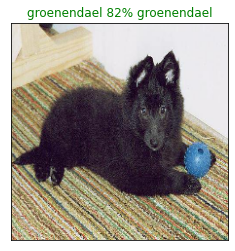

In [55]:
plot_predictions(predictions, valid_labels, valid_images, n=77)

In [0]:
# visualize our model predictions
def plot_preds_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for
  sample n
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # get pred label
  pred_label = get_pred_label(pred_prob)

  # find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  # find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # fing the top 10 prediction labels
  top_10_pred_labels = unique_labels[top_10_pred_indexes]

  # setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values, color='gray')
  plt.xticks(np.arange(len(top_10_pred_labels))
            , labels=top_10_pred_labels, rotation='vertical')
  # change the color of true labels
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')
  else:
    pass

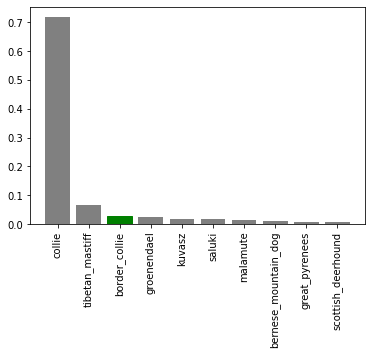

In [57]:
plot_preds_conf(predictions, valid_labels, n=9)

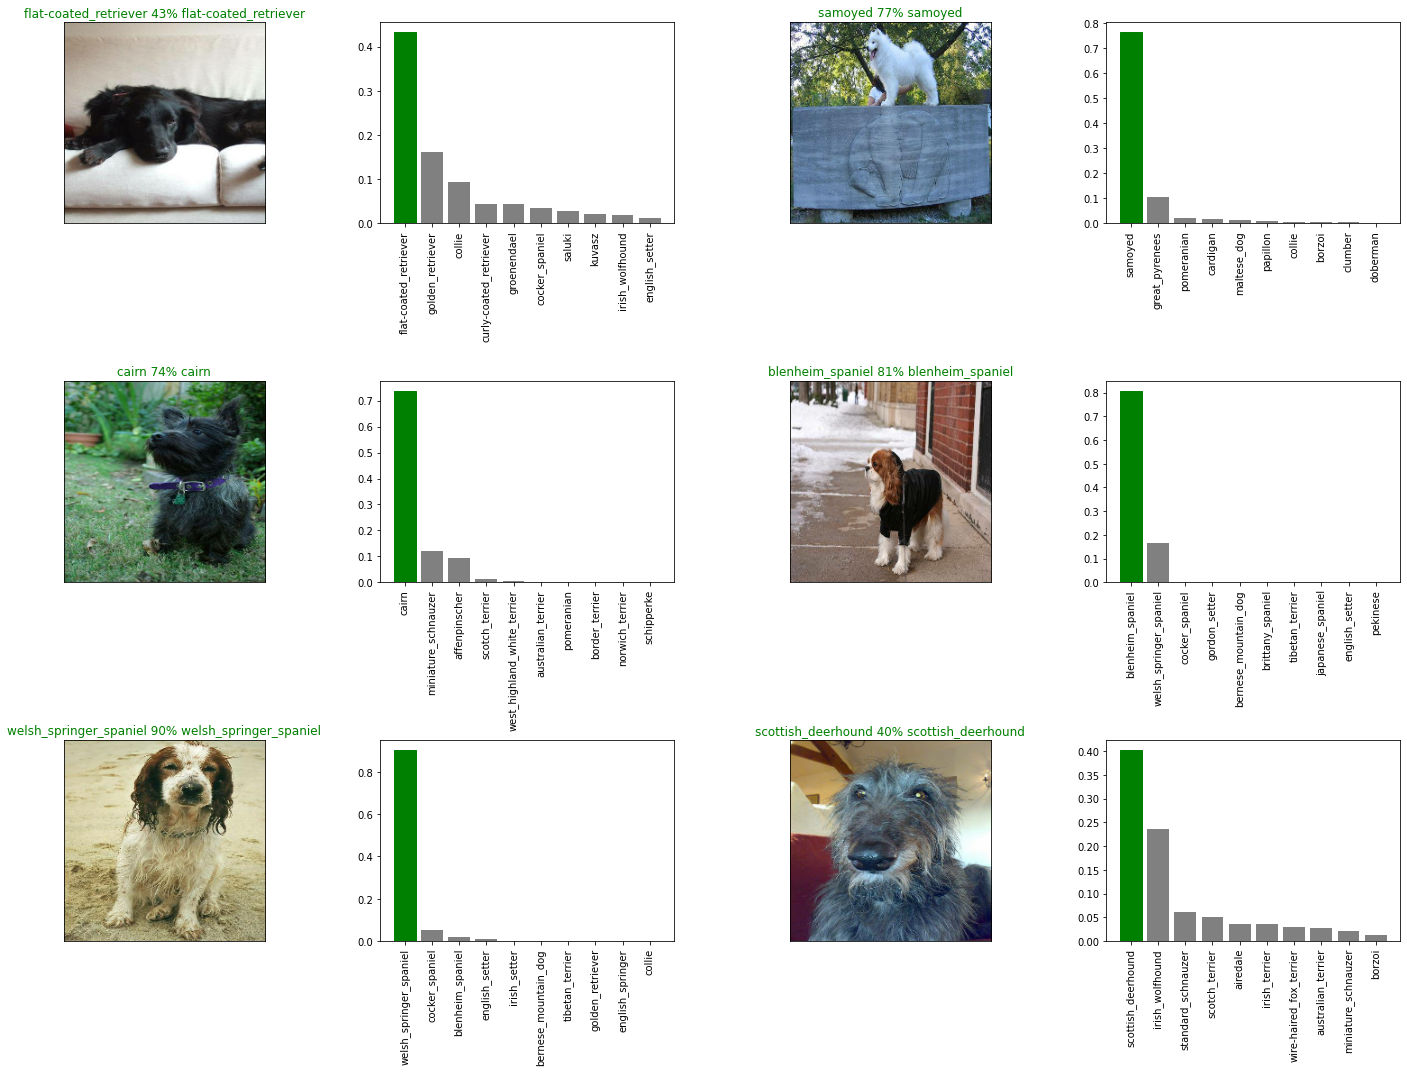

In [58]:
# visualize some of our images
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_predictions(prediction_probabilities=predictions,
            labels=valid_labels,
            images=valid_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_preds_conf(prediction_probabilities=predictions,
                 labels=valid_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [0]:
 # create a function to save our model
 def save_model(model, suffix=None):
   """
   Save a given model into a directory and append a suffix(string)
   """

   # create a model directory path name with current time
   model_dir = os.path.join('/content/drive/My Drive/data/dog_vision/logs',
                            datetime.datetime.now().strftime('%Y-%m-%d-%H:%M:%S'))
   model_path = model_dir + '-' + suffix + '.h5'

   print(f'Saving model into : {model_path} ...')
   model.save(model_path)
   return model_path

In [0]:
# create a function to load the model

def load_model(model_path):
  """
  Load a save model from specifid path
  """
  print(f'Loading model from : {model_path} ...')
  model = tf.keras.models.load_model(model_path, 
                                     custom_objects={'KerasLayer': hub.KerasLayer})
  return model

In [63]:
# save the model (1000 images)
save_model(model, suffix='1000-images-demo')

Saving model into : /content/drive/My Drive/data/dog_vision/logs/2020-04-12-07:10:01-1000-images-demo.h5 ...


'/content/drive/My Drive/data/dog_vision/logs/2020-04-12-07:10:01-1000-images-demo.h5'

In [64]:
# load the saved model
loaded_1000_image_model = load_model('/content/drive/My Drive/data/dog_vision/logs/2020-04-12-07:10:01-1000-images-demo.h5')

Loading model from : /content/drive/My Drive/data/dog_vision/logs/2020-04-12-07:10:01-1000-images-demo.h5 ...


In [65]:
# evaluate the presaved model
print(model.evaluate(valid_data))
print(loaded_1000_image_model.evaluate(valid_data))

7/7 [==============================] - 1s 103ms/step - loss: 1.2613 - accuracy: 0.6600
[1.2613201141357422, 0.6600000262260437]
7/7 [==============================] - 1s 115ms/step - loss: 1.2613 - accuracy: 0.6600
[1.2613201141357422, 0.6600000262260437]


## Training a model on the full data

In [68]:
# create a data batch with full data set
full_data = data_batch(x, y, batch_size=32)
full_data

Creating training data batches ...


<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [69]:
# create a model for full data
full_model = create_model()

Building a model which: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [0]:
# create full model tensorboard
full_model_tensorboard = create_tensorboard_callback()

# No validation data set
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy'
                                                        , patience=3)

In [71]:
# fit the full model to full data
full_model.fit(x=full_data, epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 4850s 15s/step - loss: 1.3396 - accuracy: 0.6698
Epoch 2/100
320/320 [==============================] - 48s 149ms/step - loss: 0.3978 - accuracy: 0.8840
Epoch 3/100
320/320 [==============================] - 48s 149ms/step - loss: 0.2345 - accuracy: 0.9349
Epoch 4/100
320/320 [==============================] - 47s 147ms/step - loss: 0.1527 - accuracy: 0.9646
Epoch 5/100
320/320 [==============================] - 47s 146ms/step - loss: 0.1064 - accuracy: 0.9796
Epoch 6/100
320/320 [==============================] - 46s 145ms/step - loss: 0.0773 - accuracy: 0.9860
Epoch 7/100
320/320 [==============================] - 46s 145ms/step - loss: 0.0588 - accuracy: 0.9911
Epoch 8/100
320/320 [==============================] - 45s 142ms/step - loss: 0.0457 - accuracy: 0.9958
Epoch 9/100
320/320 [==============================] - 45s 141ms/step - loss: 0.0372 - accuracy: 0.9958
Epoch 10/100
320/320 [==============================] - 45s 141m

In [72]:
# save the full model
save_model(full_model, suffix='full-model-images')

Saving model into : /content/drive/My Drive/data/dog_vision/logs/2020-04-12-09:11:04-full-model-images.h5 ...


'/content/drive/My Drive/data/dog_vision/logs/2020-04-12-09:11:04-full-model-images.h5'

In [73]:
# load the full model
loaded_full_model = load_model('/content/drive/My Drive/data/dog_vision/logs/2020-04-12-09:11:04-full-model-images.h5')

Loading model from : /content/drive/My Drive/data/dog_vision/logs/2020-04-12-09:11:04-full-model-images.h5 ...


## Making predictions on the test dataset

In [74]:
# load test images file names
test_path = '/content/drive/My Drive/data/dog_vision/test/'
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/drive/My Drive/data/dog_vision/test/ea6005562757cf5a7a37d70134d28870.jpg',
 '/content/drive/My Drive/data/dog_vision/test/f44005bd8019c5b9fb3ba2216e5d2af8.jpg',
 '/content/drive/My Drive/data/dog_vision/test/f11d3e75389720c45f2c0001c131ba21.jpg',
 '/content/drive/My Drive/data/dog_vision/test/f540547111a9b6bda288b694a5536702.jpg',
 '/content/drive/My Drive/data/dog_vision/test/ecf3d6520cec171b81830fb38fce1570.jpg',
 '/content/drive/My Drive/data/dog_vision/test/effcbcfa58ba87eac8439b7106d8623c.jpg',
 '/content/drive/My Drive/data/dog_vision/test/ed1f9841f56f9e0122782f734919f521.jpg',
 '/content/drive/My Drive/data/dog_vision/test/f29de7ef9ac75de46170fd50f5b2d173.jpg',
 '/content/drive/My Drive/data/dog_vision/test/ec4536edae000402b075a55d062eca21.jpg',
 '/content/drive/My Drive/data/dog_vision/test/f2fb1e6cb9501847d0ab84f1edc36b78.jpg']

In [79]:
# create test data batches
test_data = data_batch(x=test_filenames,y=None, test_data=True)
test_data

Creating test data batches ...


<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [81]:
# make prediction on the test data batch
test_predictions = full_model.predict(test_data, verbose=1)

324/324 [==============================] - 5706s 18s/step


In [0]:
# Save predictions (NumPy array) to csv file (for access later)
np.savetxt("/content/drive/My Drive/data/dog_visionpreds_array.csv", test_predictions, delimiter=",")

In [0]:
# Load predictions (NumPy array) from csv file
loaded_test_predictions = np.loadtxt("/content/drive/My Drive/data/dog_visionpreds_array.csv", delimiter=',')

## Preparing dataset predictions for Kaggle

In [85]:
import pandas as pd
# create pandas dataframe
preds_df = pd.DataFrame(columns=['id'] + list(unique_labels))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [86]:
# Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,ea6005562757cf5a7a37d70134d28870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f44005bd8019c5b9fb3ba2216e5d2af8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,f11d3e75389720c45f2c0001c131ba21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f540547111a9b6bda288b694a5536702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ecf3d6520cec171b81830fb38fce1570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_labels)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,ea6005562757cf5a7a37d70134d28870,6.76547e-16,1.64772e-14,6.79423e-14,6.29542e-10,1.85924e-10,1.91781e-09,1.03093e-08,9.14881e-16,2.86072e-15,6.81794e-13,5.59264e-14,4.46747e-12,1.09071e-07,1.41737e-12,3.18215e-11,4.27474e-13,1.19944e-15,2.58478e-11,1.02326e-12,1.04232e-14,5.11346e-14,4.59984e-11,6.28393e-07,4.37667e-13,1.55991e-13,4.14749e-13,6.18545e-18,3.0741e-16,6.3949e-14,1.24108e-12,1.52574e-12,1.78089e-10,4.75257e-11,4.5656e-13,5.22077e-12,1.84111e-12,1.80395e-11,1.0976e-12,1.72066e-09,...,8.6306e-12,5.46245e-12,4.61327e-14,1.47672e-13,3.36789e-12,2.82442e-11,1.73681e-13,3.50156e-13,5.27366e-12,3.27832e-11,2.11486e-11,0.999955,7.15639e-14,7.4504e-15,2.88868e-13,1.91049e-09,9.67602e-15,3.80122e-13,1.24642e-13,5.25072e-14,1.98049e-16,8.49536e-15,2.52267e-13,1.36306e-14,5.4847e-10,1.87262e-13,5.41863e-13,2.98928e-12,2.63944e-06,3.94678e-13,2.09294e-12,6.43439e-14,2.3893e-10,6.62292e-11,6.31711e-13,7.48034e-11,1.21243e-12,2.08727e-13,3.51343e-13,3.01058e-12
1,f44005bd8019c5b9fb3ba2216e5d2af8,3.25109e-16,6.20127e-16,6.83074e-11,8.4384e-14,1.59219e-17,1.06077e-18,1.24066e-09,1.62609e-12,1.20697e-12,1.29367e-15,5.38468e-16,1.08042e-16,2.1824e-15,3.22496e-16,5.92608e-12,1.01787e-16,7.42259e-18,1.44083e-14,5.5504e-15,7.83997e-18,8.13375e-15,1.69649e-15,4.00088e-15,4.6199e-16,7.31104e-15,1.29417e-19,4.97204e-16,6.38362e-14,1.72429e-13,2.02797e-14,1.56197e-11,2.10284e-15,3.29159e-16,2.06361e-16,2.36829e-14,1.38291e-18,0.999998,1.80679e-06,1.22298e-15,...,2.01188e-14,3.59265e-11,2.97713e-16,3.20751e-15,3.41748e-15,3.02996e-17,4.92096e-12,3.81525e-18,1.8295e-17,5.55115e-18,1.1617e-14,3.78815e-19,3.90769e-17,9.42044e-18,6.51567e-12,1.01946e-16,1.48881e-10,7.37064e-14,1.71921e-16,4.09705e-13,1.69986e-17,1.13935e-17,2.51717e-15,1.21531e-18,4.42834e-15,1.4369e-14,4.36787e-16,1.31765e-17,1.78972e-20,2.09619e-17,3.01135e-15,1.89707e-12,1.54333e-13,1.3077e-17,4.57642e-17,5.59124e-14,1.04003e-12,1.16901e-14,7.57738e-15,2.34495e-17
2,f11d3e75389720c45f2c0001c131ba21,5.31583e-11,1.33094e-12,2.59812e-11,4.96734e-10,5.87991e-09,0.999701,7.8076e-11,9.69925e-07,8.03412e-12,2.51674e-10,1.28207e-07,1.48659e-05,5.51758e-11,5.35184e-10,5.15559e-14,1.60474e-09,2.75903e-09,2.79137e-10,9.6034e-12,9.73434e-10,1.36935e-12,8.82312e-13,4.46682e-12,8.83172e-12,2.07953e-10,7.59447e-12,1.03482e-15,7.04308e-10,2.13481e-09,1.63039e-12,8.2309e-11,3.40741e-13,2.86193e-11,1.93101e-07,4.04972e-09,8.00504e-13,8.99022e-09,4.62351e-11,1.83294e-06,...,7.52392e-09,8.14267e-12,6.83632e-09,9.95664e-10,1.09921e-12,1.1741e-10,7.35488e-09,2.12237e-14,1.05279e-09,1.67765e-08,2.00431e-09,3.23331e-09,6.09151e-09,1.64898e-11,6.62771e-10,5.43297e-10,1.74372e-11,1.62803e-09,8.61305e-12,4.43411e-09,2.60775e-10,2.14123e-11,8.92529e-11,3.42559e-11,5.21019e-12,3.67744e-11,9.81662e-11,4.73643e-12,4.67935e-11,8.35824e-10,8.56339e-11,1.02199e-12,2.10806e-11,4.20723e-11,3.47559e-10,2.06056e-09,1.54236

In [0]:
# Save our predictions dataframe to CSV for submission to Kaggle
preds_df.to_csv("/content/drive/My Drive/data/dog_vision/full_model_predictions_submission_1_mobilenetV2.csv",
                index=False)

### Making predictions on custom images

In [90]:
# Get custom image filepaths
custom_path = '/content/drive/My Drive/data/dog_vision/custom_dog/'
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]
custom_image_paths

['/content/drive/My Drive/data/dog_vision/custom_dog/lakeland-terriers.jpg',
 '/content/drive/My Drive/data/dog_vision/custom_dog/goldern_retriver.jpg',
 '/content/drive/My Drive/data/dog_vision/custom_dog/labrador_retriver.jpg']

In [92]:
# Turn custom images into batch datasets 
custom_data = data_batch(custom_image_paths, y=None, test_data=True)
custom_data

Creating test data batches ...


<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [94]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)
custom_preds.shape

(3, 120)

In [95]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['lakeland_terrier', 'golden_retriever', 'labrador_retriever']

In [96]:
# Get custom images (our unbatchify() function won't work since there aren't labels... maybe we could fix this later)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

custom_images

[array([[[2.61554644e-02, 2.54901975e-01, 3.04621877e-03],
         [2.61554644e-02, 2.54901975e-01, 3.04621877e-03],
         [2.61554644e-02, 2.54901975e-01, 3.04621877e-03],
         ...,
         [3.11029226e-01, 4.39741135e-01, 1.61659673e-01],
         [3.22863817e-01, 4.44432467e-01, 1.69922635e-01],
         [3.38200152e-01, 4.59768802e-01, 1.85258970e-01]],
 
        [[4.96848784e-02, 2.65371174e-01, 2.62605073e-03],
         [4.96848784e-02, 2.65371174e-01, 2.62605073e-03],
         [4.96848784e-02, 2.65371174e-01, 2.62605073e-03],
         ...,
         [3.24894577e-01, 4.53606486e-01, 1.75525010e-01],
         [3.40231448e-01, 4.61800098e-01, 1.87290266e-01],
         [3.55567247e-01, 4.77135897e-01, 2.02626064e-01]],
 
        [[7.10352957e-02, 2.71035314e-01, 4.47054859e-04],
         [8.58787298e-02, 2.85878718e-01, 1.52904904e-02],
         [9.77297276e-02, 2.97729731e-01, 2.71414835e-02],
         ...,
         [3.41526419e-01, 4.70238328e-01, 1.92156881e-01],
        

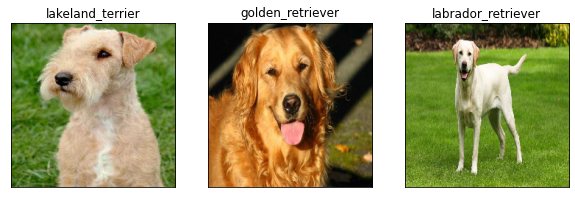

In [97]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)